
# Task 1: Permutations and Combinations

_Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first_.

- _Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells._

### Steps:
1. Calculate the total number of ways to select 6 cups from 12.
2. Calculate the successful ways for different scenarios (6/5/4 correct attempts).
3. Sum up the successful ways.
4. Calculate the probability.


In [374]:
import math
from scipy.special import comb 


total_cups = 12  # Total number of cups
milk_cups = 6  # Number of cups with milk added first
tea_cups = 6  # Number of cups with tea added first
all_attempts = comb(total_cups, milk_cups)
probability = 1 / all_attempts

print(f"Probability of selecting all 6 milk-first cups correctly: {probability:.10f}")


Probability of selecting all 6 milk-first cups correctly: 0.0010822511


- _Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error._

In [375]:
# Calculate the number of ways she has to select exactly 5 correct and 1 incorrect (combination)
five_correct_cups = comb(6, 5) * comb(6, 1) 

# Calculate the number of ways to select all 6 cups correctly
six_correct_cups = 1  # There is only one way to pick all 6 correctly as only 6 cups have milk in first

# Total successful ways 
successful_ways = five_correct_cups + six_correct_cups

# Probability of selecting at least 5 correct cups
probability_five_cups_correct= successful_ways / all_attempts

print(f"Probability of selecting at least 5 correct cups: {probability_five_cups_correct:.10f}")


Probability of selecting at least 5 correct cups: 0.0400432900


- _Would you accept two errors? Explain_.

Allowing two errors would mean calculating the probability of selecting at least four correct cups out of six, which would increase the probability of a correct guess. However, allowing more errors lowers the test’s reliability, making it easier for the lady to guess the tea that has the tea in first. 

In [376]:
# Calculate the number of ways to select exactly 4 correct and 2 incorrect (combination)
four_correct_cups = comb(milk_cups, 4) * comb(tea_cups, 2) 
successful_ways = four_correct_cups + five_correct_cups + six_correct_cups
probability_four_cups_correct = successful_ways / all_attempts
print(f"Probability of selecting at least 4 correct cups: {probability_four_cups_correct:.10f}")

Probability of selecting at least 4 correct cups: 0.2835497835


## References:
- https://www.geeksforgeeks.org/permutations-and-combinations/
- https://betterexplained.com/articles/easy-permutations-and-combinations/


# Task 2: numpy's Normal Distribution

_In this task you will assess whether numpy.random.normal() properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0._

In [377]:
from scipy.stats import shapiro, norm
# Binomial distribution.
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
# Statistics.
import scipy.stats as stats

#Generate a sample of 100.000 values
sample_size = 100_000

#Using the function with mean 10.0 and standard deviation 3.0.
mean = 10.0
std_dev = 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)


_Use the scipy.stats.shapiro() function to test whether your sample came from a normal distribution. Explain the results and output._

In [378]:
# Perform the Shapiro Wilk test.
stats.shapiro(sample)

/Users/laiscoletta/Library/Python/3.10/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9999780277269907), pvalue=np.float64(0.8680539452082106))

_Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it._

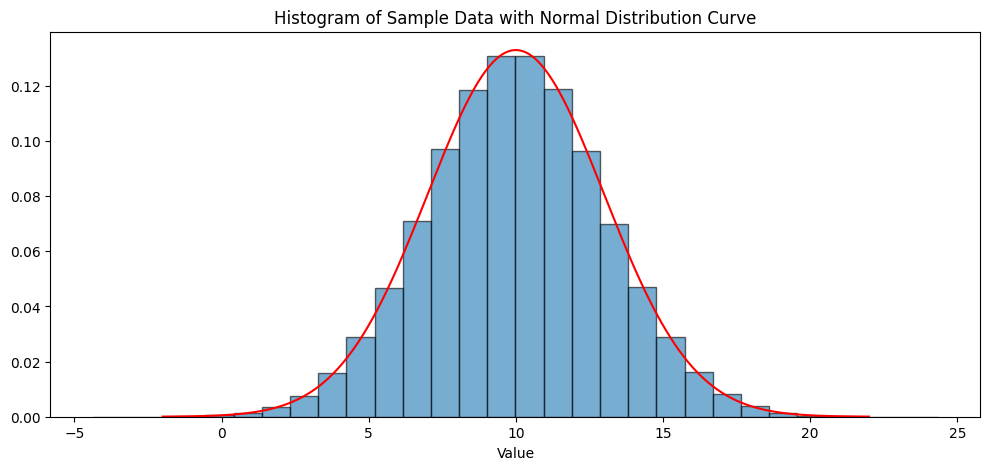

In [379]:
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the histogram of the data with density normalization
ax.hist(sample, edgecolor='black', density=True, bins=30, alpha=0.6)

# Create an x range.
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Get y values.
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
ax.plot(x, y, 'r-')

# Customize the plot
ax.set_title("Histogram of Sample Data with Normal Distribution Curve")
ax.set_xlabel("Value")
plt.show()

## Reference
- https://onecompiler.com/python/42azwxnth

# Task 3: t-Test Calculation
_Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program_.

| Patient ID | Before | After |
|------------|--------|-------|
| 0          | 63     | 64    |
| 1          | 68     | 64    |
| 2          | 70     | 68    |
| 3          | 64     | 64    |
| 4          | 74     | 73    |
| 5          | 67     | 70    |
| 6          | 70     | 72    |
| 7          | 57     | 54    |
| 8          | 66     | 61    |
| 9          | 65     | 63    |



### _Part 1: Calculate the t-statistic based on this data set, using Python_. 

In [380]:
# 1. Load Required Libraries
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creat the dataset
data = {
    'Patient ID': range(10),
    'Before': [63, 68, 70, 64, 74, 67, 70, 57, 66, 65],
    'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]
}
df = pd.DataFrame(data)
df.set_index('Patient ID', inplace=True)
df

,Before,After
Patient ID,,
0,63,64
1,68,64
2,70,68
3,64,64
4,74,73
5,67,70
6,70,72
7,57,54
8,66,61


**Compute the Differences** $D$ between the "Before" and "After" values.

In [381]:
df['Difference'] = df['Before'] - df['After']

**Calculate the Mean** $\bar{D}$ of these differences.

In [382]:
mean_diff = df['Difference'].mean()

**Calculate the Standard Deviation** $s_D$ of these differences.

In [383]:
std_diff = df['Difference'].std(ddof=1)  # Standard deviation with Bessel's correction
n = len(df)  # Sample size

mean_diff, std_diff

(np.float64(1.1), np.float64(2.6012817353502227))


**Compute the t-statistic** using the formula:

   $$
   t = \frac{\bar{D}}{s_D / \sqrt{n}}
   $$

   where $n$ is the number of paired samples.

In [384]:
# Calculate t-statistic
t_statistic_manual = mean_diff / (std_diff / np.sqrt(n))
t_statistic_manual

np.float64(1.3372274824806283)

### _Part 2: Compare it to the value given by scipy.stats. Explain your work and list any sources used_.

In [385]:
# Calculate t-statistic using scipy.stats
t_statistic_scipy, p_value = stats.ttest_rel(df['Before'], df['After'])
t_statistic_scipy, p_value

(np.float64(1.337227482480628), np.float64(0.21396011317404623))


- **t-statistic**: Measures the degree of difference between the two paired groups (before and after).
- **p-value**: Indicates the probability of observing this difference if the null hypothesis (no difference) were true.

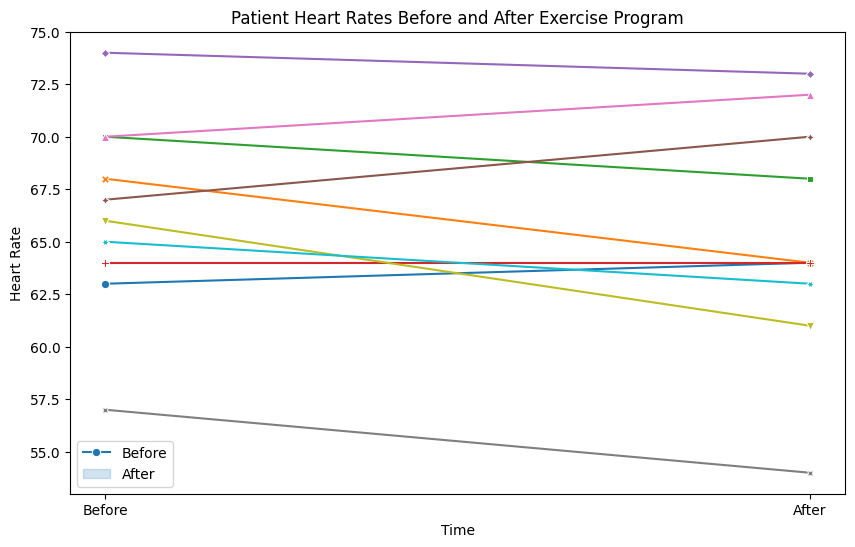

In [387]:
# Plotting heart rates before and after
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[['Before', 'After']].T, markers=True, dashes=False)
plt.title("Patient Heart Rates Before and After Exercise Program")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend(['Before', 'After'])
plt.show()


Conclusion
Results: The t-statistic and p-value give insight into whether the observed differences are statistically significant.
Interpretation: If the p-value is below 0.05, we can conclude that the exercise program had a significant effect on heart rates.